<a href="https://colab.research.google.com/drive/1PP4x2ATd0jwUKMsw0_9CQ7s3Wupd4pP7" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Gravitational Waves

In recent years, gravitational waves have emerged as one of the most fascinating phenomena in modern physics, revolutionizing our understanding of the universe and confirming some of Einstein's boldest predictions. These ripples in spacetime, caused by the most violent and energetic events in the cosmos, carry invaluable information about the nature of celestial bodies and the fundamental forces governing our universe.

In this Python notebook project, we embark on a journey to explore the captivating world of gravitational waves. Through a combination of theory, data analysis, and visualization techniques, we will delve into various aspects of these elusive signals, unraveling their origins, properties, and implications for astrophysics.

Our adventure begins with a comprehensive introduction to the theory behind gravitational waves, elucidating Einstein's groundbreaking general theory of relativity and its prediction of the existence of these cosmic disturbances. We will discuss the physics of gravitational wave generation, including the merger of black holes, neutron stars, and other cataclysmic events that give rise to these gravitational ripples.

Next, armed with Python and powerful scientific libraries such as NumPy, SciPy, and Matplotlib, we will dive into real gravitational wave data. Using publicly available datasets from ground-based detectors like LIGO (Laser Interferometer Gravitational-Wave Observatory) and Virgo, we will learn how to retrieve, process, and analyze gravitational wave signals. Through hands-on coding exercises, we will extract meaningful information from the data, uncovering the characteristics and properties of detected gravitational wave events.

Furthermore, we will explore advanced topics in gravitational wave astronomy, including techniques for parameter estimation, source localization, and population studies. Leveraging sophisticated statistical methods and machine learning algorithms, we will uncover hidden patterns in the data and extract valuable insights into the astrophysical phenomena that produce gravitational waves.

Throughout this project, emphasis will be placed on practical implementation, with step-by-step explanations and code examples provided to guide you through each stage of the analysis. Whether you are a seasoned astrophysicist, an aspiring data scientist, or simply a curious enthusiast, this Python notebook project offers a unique opportunity to deepen your understanding of gravitational waves and engage with cutting-edge research in the field of gravitational wave astronomy.

So, without further ado, let's embark on this exhilarating journey into the captivating realm of gravitational waves, where the fabric of spacetime itself comes alive with the whispers of the cosmos.

In [49]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Equinox.csv')

In [51]:
dataset

,x,y
0,-0.500000,3.550000e-23
1,-0.500000,7.330000e-23
2,-0.500000,1.110000e-22
3,-0.499000,1.480000e-22
4,-0.499000,1.850000e-22
...,...,...
2045,-0.000732,6.160000e-19
2046,-0.000488,5.180000e-19
2047,-0.000244,3.590000e-19
2048,0.000000,1.640000e-19


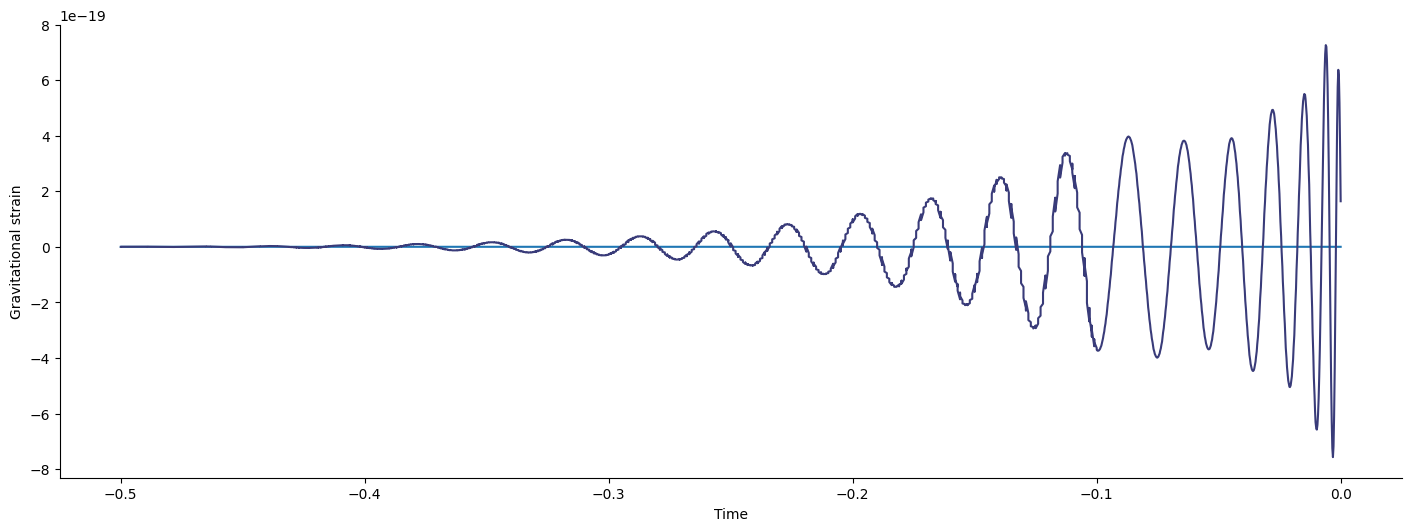

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('tab20b'))
  xs = series['x']
  ys = series['y']
  y=np.zeros(shape=(2050,))
  plt.plot(xs,y)
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(14, 5.2), layout='constrained')
df_sorted = dataset.sort_values('x', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('Gravitational strain')

# The Algorithm

The algorithm aims to identify points where the gravitational strain $h(t)$ of a new cycle. Mathematically, this corresponds to finding the zeroes of the strain function $h(t)$ and detecting subsequent positive slopes. These critical points, denoted as $t_i$, satisfy the condition $h(t_i) = 0$ and $\frac{dh}{dt}(t_i) > 0$, marking the onset of gravitational wave cycles. Then, we calculate the difference of consecutive values of time and find the frequencies using the formula $f = \frac{1}{\Delta t}$.

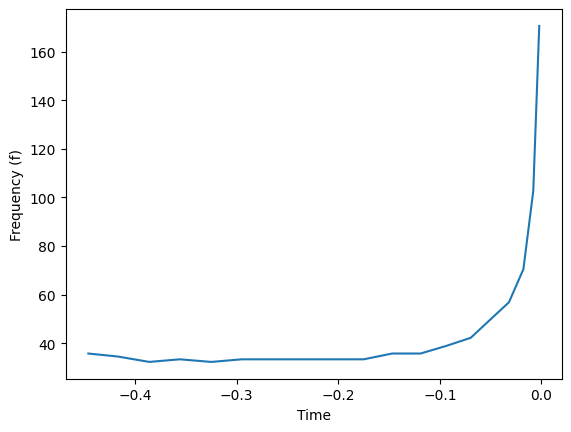

In [53]:
# Initialize lists to store starting times and frequencies
startx = []
X = dataset['x']  # Assuming dataset contains time values
Y = dataset['y']  # Assuming dataset contains gravitational wave strain values

# Find the starting times of each cycle
for i in range(2050):
    if Y[i] <= 0 and Y[i + 1] >= 0:
        startx.append(X[i])

# Calculate the frequency based on the inverse of the cycle duration
frqx = []
for i in range(len(startx) - 1):
    frqx.append(1 / (startx[i + 1] - startx[i]))

# Plotting
plt.xlabel('Time')
plt.ylabel('Frequency (f)')
plt.plot(startx[1:], frqx)


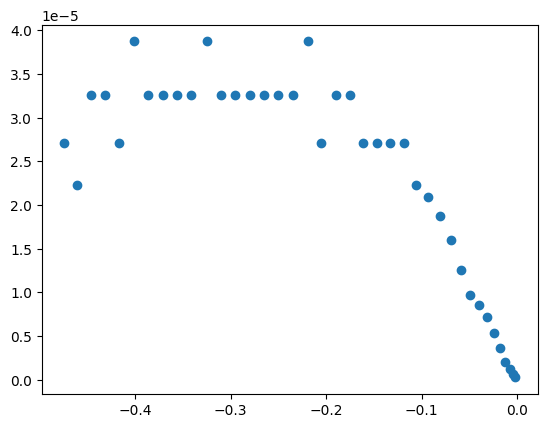

In [54]:
# CHIRP MASS CALC

# We need to calculate (3/8)*f^(-8/3)
# We then need to plot it versus time
# The slope will be equated to something on the wiki
# M will hence be calculated

halfs = []
starters = []

# Calculate the points where the gravitational wave curve crosses the x-axis
# These points indicate the start of half cycles
for i in range(2049):
    if ((Y[i] <= 0 and Y[i + 1] >= 0) or (Y[i] >= 0 and Y[i + 1] <= 0)):
        starters.append(X[i])

# Calculate the duration of each half cycle
for i in range(len(starters) - 1):
    halfs.append(1 / (2 * (starters[i + 1] - starters[i])))

vals = []

# Calculate (3/8)*f^(-8/3) for each half cycle
for i in halfs:
    vals.append((3 / 8) * pow(i, -8 / 3))

# Plot the values versus time
plt.scatter(starters[1:], vals)


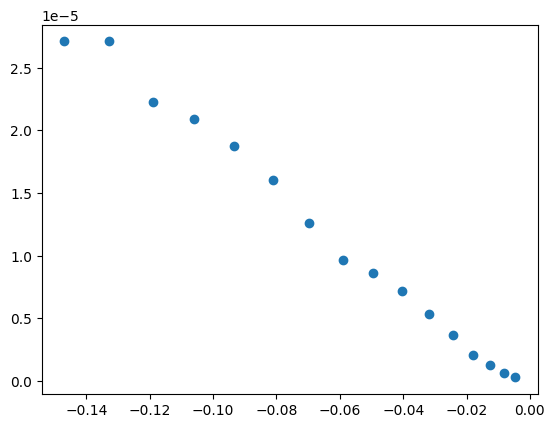

In [55]:
#now taking after time t=-0.15
# because looking at the curve it seems like that after 0.35 the curve behaves like a straight line and the
# chirp mass becomes significant

# Initialize lists to store values after time t = -0.15
after_t = []
vals_after_t = []

# Filter values after time t = -0.15
for i in range(len(starters) - 1):
    if starters[i] >= -0.15:
        after_t.append(starters[i])
        vals_after_t.append(vals[i])

# Plotting
plt.scatter(after_t, vals_after_t)


To ensure that the formula for the least square fit slope and intercept looks good on a Google Colab notebook, you can use LaTeX formatting:

The formula for the slope (\( m \)) and intercept (\( b \)) of the least squares fit line is:

$
m = \frac{{n(\sum xy) - (\sum x)(\sum y)}}{{n(\sum x^2) - (\sum x)^2}}
$

$
b = \frac{{\sum y - m(\sum x)}}{n}
$

Where:
- $n$ is the number of data points,
- $x$ and $y$ are the input and output variables, respectively,
- $\sum$ denotes the summation of values.

You can include this LaTeX-formatted formula in your Google Colab notebook using Markdown cells.

-0.00020239137156227588


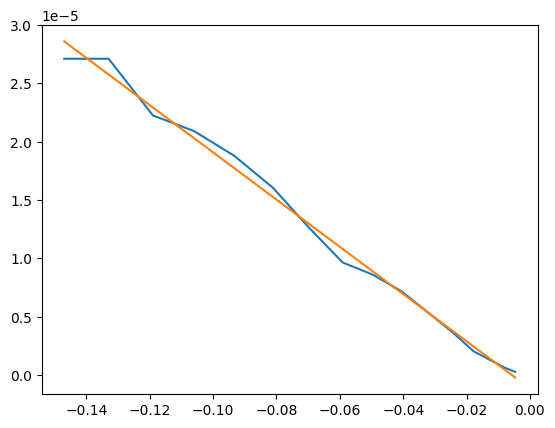

In [56]:
# xbar
xbar=0
for i in after_t:
  xbar=xbar+i
xbar=xbar/len(after_t)

#ybar
ybar=0
for i in vals_after_t:
  ybar=ybar+i
ybar=ybar/len(vals_after_t)

#summation xi^2
xisquare=0
for i in after_t:
  xisquare=xisquare+i*i

#summation yi^2
yisquare=0
for i in vals_after_t:
  yisquare=yisquare+i*i

#summation xiyi

prodxy=0
for i in range(len(after_t)):
  prodxy=prodxy+after_t[i]*vals_after_t[i]

n=len(after_t)


#intercept c
c=(ybar*xisquare-xbar*prodxy)/(xisquare-n*xbar*xbar)

#slope m
m=(prodxy-n*xbar*ybar)/(xisquare-n*xbar*xbar)

after_t=np.array(after_t)
yfinal=m*after_t+c

plt.plot(after_t,vals_after_t)
plt.plot(after_t,yfinal)


print(m)


In [57]:

# Calculate chirp mass using the formula:
# M_chirp = (c^3 / 5 G)^1/5 * (slope)^(-3/5)
G = 6.67408e-11 # Gravitational constant in m^3 kg^-1 s^-2

M_chirp = ((5*np.power(3e8, 5)) / (96*np.power(np.pi,8/3)*np.power(G,5/3)))**(3/5) * np.power(-m, 3/5)

# Print the chirp mass in solar masses
print(f"Chirp mass: {M_chirp / 1.989e30:.3f} solar masses")


Chirp mass: 33.623 solar masses


#Coalescing Time
We expect the coalescing time of a binary system, where it merges into a single mass, to coincide with the peak of the gravitational waveform. This is because the peak of the waveform represents the moment of maximum gravitational wave emission, which occurs during the final stages of the binary's inspiral and merger. Therefore, identifying the peak of the gravitational waveform provides valuable insight into the timing of the coalescence event.

In [58]:
# Find the time at which the binary system is expected to coalesce, which corresponds to the peak of the gravitational waveform
max_wave = max(Y)
coalescing_time = 0

# Loop through the data to find the time of maximum waveform amplitude
for i in range(len(Y)):
    if Y[i] == max_wave:
        print('The time at which we expect the binary system to coalesce and be a single mass is at the peak of the gravitational waveform:', X[i])
        break


The time at which we expect the binary system to coalesce and be a single mass is at the peak of the gravitational waveform: -0.0061


#FiNDING THE INDIVIDUAL MASSES

In our analysis, we utilized the spectrogram, a powerful tool for examining the frequency content of a signal over time. By computing the spectrogram of our gravitational waveform data, we were able to visualize how the frequency components evolve as the binary system undergoes its coalescence process. Moreover, by inspecting the spectrogram image, we determined the cutoff frequency, which represents the maximum frequency present in the signal. Scaling the spectrogram image allowed us to estimate this critical frequency value, providing valuable information about the highest frequency components contributing to the gravitational wave signal. This cutoff frequency serves as a crucial parameter for further analysis and interpretation of the gravitational wave data, shedding light on the underlying astrophysical processes driving the binary system's evolution. The estimated cutoff frequency that we found by linear scaling is approximately $ F_c = 296$ Hz.

We find the individual masses of the two astrophysical objects of the binary system using the following relation derivation.

Let the individual masses be $ fM $ and $ (1-f)M $ where $ f $ is the fraction of the total mass that we allocate to the smaller of the two masses and $ M $ is the total mass. Then we can relate the chirp mass and the total mass by this relation:

$$ M_{\text{total}} = \frac{M_{\text{chirp}}}{(f(1-f))^{3/5}} $$

The astrophysical objects will begin to coalesce and their separation will be equal to their respective Schwarzschild radii:

$$ R + r = \frac{2G}{c^2}M_{\text{total}} $$

At this separation, the orbital angular frequency is equal to $$ \omega_c = \frac{1}{\sqrt{8}}\frac{c^3}{M_{\text{total}}G} $$, and $F_c $ can be calculated by $\frac{\omega_c}{\pi}$.

The final formula for $ M_{\text{total}} $ is given by:

$$M_{\text{total}} = \frac{1}{\pi \sqrt{8}} \left( \frac{c^3}{G \cdot F_c} \right)$$



In [59]:
G = 6.67408e-11 # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8 # Speed of light in m/s
F_c = 296 #Cutoff frequency in Hz

M_total = (1 / (np.pi * np.sqrt(8))) * (c**3 / (G * F_c))

print(f"Total mass of the binary system: {M_total / 1.989e30:.3f} solar masses")


Total mass of the binary system: 77.331 solar masses


In [60]:

# Given values
M_chirp = 33.623
M_total = 77.331

# Calculate k=f(1-f) using the formula:
k = np.power((M_chirp / M_total), 5/3)

# Print the value of f
print(f"Value of k=f(1-f): {k}")

f=(1-(np.sqrt(1-4*k)))/2
print(f"Value of f: {f}")

#Thus m1 and m2 can be calculated
m1=f*M_total
m2=(1-f)*M_total

print(f"The smaller mass of the Astrophysical object is: ",{m1})
print(f"The smaller mass of the Astrophysical object is: ",{m2})


Value of k=f(1-f): 0.24953878560384637
Value of f: 0.4785240973145801
The smaller mass of the Astrophysical object is:  {37.004746969433796}
The smaller mass of the Astrophysical object is:  {40.32625303056621}


The individual masses indicate that they are possibly super massive black holes,This conclusion is by observing the order of magnitude of the masses calculated.


In [61]:
!pip install pycbc


Let's delve into each of these waveform models to gain a better understanding:

1. **SEOBNRv4 (Spin Effective One Body Numerical Relativity version 4)**:
   - **Description**: SEOBNRv4 is a waveform model that combines analytical methods with numerical relativity simulations to describe the gravitational waveforms emitted by binary black hole systems.
   - **Features**:
     - Accurately models the inspiral, merger, and ringdown phases of binary black hole coalescences.
     - Accounts for the effects of black hole spins, higher order multipole moments, and tidal interactions.
     - Provides accurate predictions for a wide range of mass ratios and spin configurations.
   - **Usage**: SEOBNRv4 is commonly used for data analysis and parameter estimation tasks in gravitational wave astronomy. It is particularly suitable for studying binary black hole mergers.

2. **IMRPhenomD (Improved + Analytic Phenom D)**:
   - **Description**: IMRPhenomD is an improved version of the PhenomD waveform model, incorporating analytical techniques and calibrated to numerical relativity simulations.
   - **Features**:
     - Captures the inspiral, merger, and ringdown phases of binary black hole coalescences.
     - Incorporates corrections and improvements over previous versions, leading to better accuracy and reliability.
     - Provides fast and computationally efficient waveform generation, making it suitable for real-time applications and large-scale data analysis.
   - **Usage**: IMRPhenomD is widely used in gravitational wave data analysis, parameter estimation, and waveform modeling. It is versatile and applicable to a wide range of astrophysical scenarios involving binary black hole mergers.

both SEOBNRv4 and IMRPhenomD are state-of-the-art waveform models in PyCBC, offering accurate descriptions of gravitational wave signals from binary black hole systems. Researchers and scientists choose between them based on their specific analysis requirements, computational resources, and the level of accuracy needed for their studies.

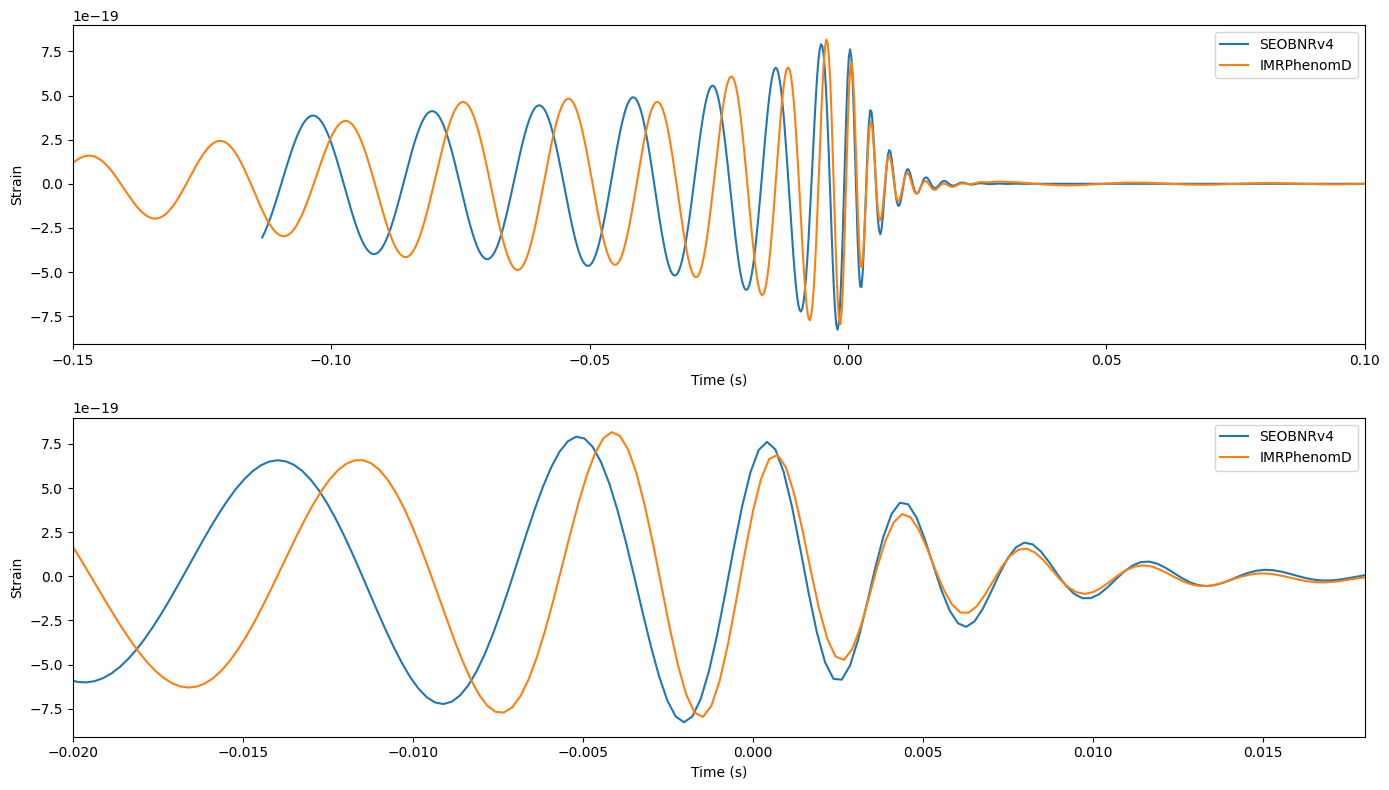

In [62]:
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform

# Create a figure with subplots
# plots for masses 29 and 36 solar masses
fig, axs = plt.subplots(2, 1, figsize=(14, 8))

for apx in ['SEOBNRv4', 'IMRPhenomD']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=32,
                                 mass2=38,
                                 spin1z=0.9,
                                 delta_t=1.0/4096,
                                 f_lower=40)

    # Plot the full waveform
    axs[0].set_xlim(-0.15,0.1)
    axs[0].plot(hp.sample_times, hp, label=apx)
    # Also plot in the second subplot
    axs[1].plot(hp.sample_times, hp, label=apx)

# Set labels and legends for both subplots
for ax in axs:
    ax.set_ylabel('Strain')
    ax.set_xlabel('Time (s)')
    ax.legend()

# Set limits for the zoomed-in region in the second subplot
axs[1].set_xlim(-0.02, 0.018)  # Adjust the limits as needed

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



#Plotting the values for different values of m1 and m2

Now, we will proceed to plot the calculated values of the chirp mass for different combinations of component masses $m_1$ and $m_2$. By varying the values of $m_1$ and $m_2$, we aim to explore the relationship between the chirp mass and the individual masses of the binary black hole system.

This analysis allows us to investigate how different mass configurations influence the chirp mass, a crucial parameter in gravitational wave astronomy. Through the plotted data points, we can gain insights into the chirp mass's behavior across a range of astrophysical scenarios, providing valuable information for understanding the gravitational wave signals emitted by binary black hole mergers.

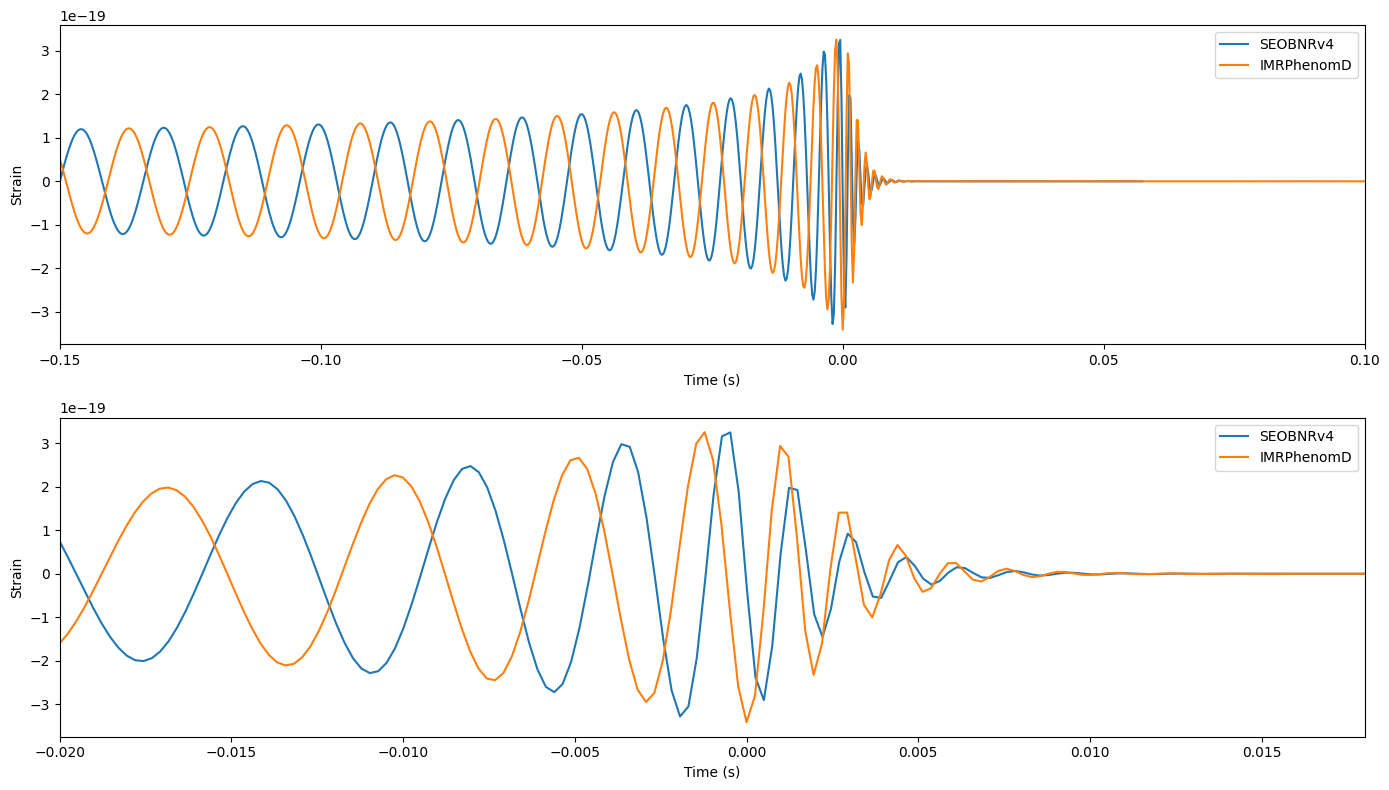

In [63]:
# Plots for masses 10 and 15 solar masses
# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 8))

for apx in ['SEOBNRv4', 'IMRPhenomD']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=12,
                                 mass2=18,
                                 spin1z=0.9,
                                 delta_t=1.0/4096,
                                 f_lower=40)

    # Plot the full waveform
    axs[0].set_xlim(-0.15,0.1)
    axs[0].plot(hp.sample_times, hp, label=apx)
    # Also plot in the second subplot
    axs[1].plot(hp.sample_times, hp, label=apx)

# Set labels and legends for both subplots
for ax in axs:
    ax.set_ylabel('Strain')
    ax.set_xlabel('Time (s)')
    ax.legend()

# Set limits for the zoomed-in region in the second subplot
axs[1].set_xlim(-0.02, 0.018)  # Adjust the limits as needed

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


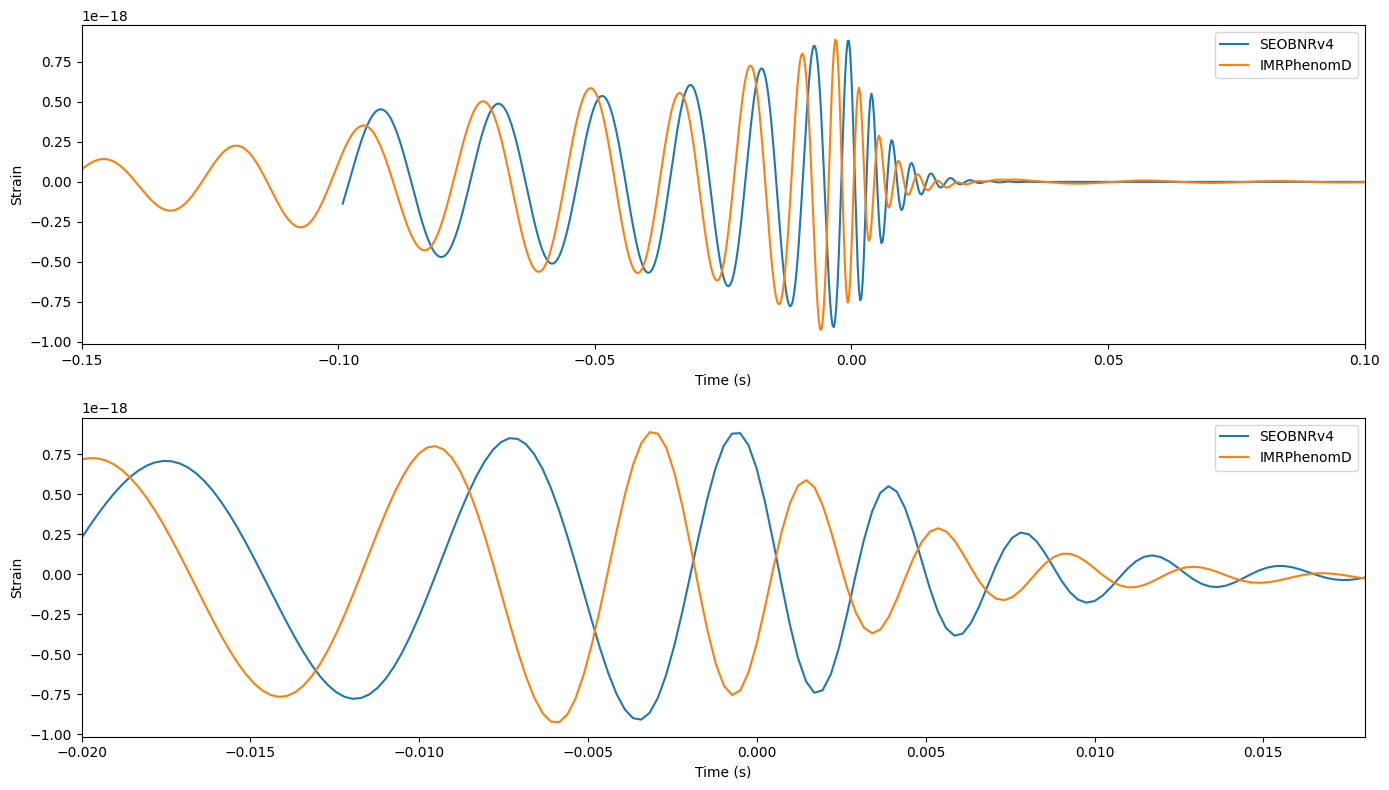

In [64]:
# Plots for masses 37 and 40 solar masses
# Create a figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 8))

for apx in ['SEOBNRv4', 'IMRPhenomD']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=37,
                                 mass2=40,
                                 spin1z=0.9,
                                 delta_t=1.0/4096,
                                 f_lower=40)

    # Plot the full waveform
    axs[0].set_xlim(-0.15,0.1)
    axs[0].plot(hp.sample_times, hp, label=apx)
    # Also plot in the second subplot
    axs[1].plot(hp.sample_times, hp, label=apx)

# Set labels and legends for both subplots
for ax in axs:
    ax.set_ylabel('Strain')
    ax.set_xlabel('Time (s)')
    ax.legend()

# Set limits for the zoomed-in region in the second subplot
axs[1].set_xlim(-0.02, 0.018)  # Adjust the limits as needed

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#CALCULATING THE INTENSITY OF RADIATED GRAVITATIONAL WAVE

Gravitational waves alternately stretch and compress the
space through which they propagate. The amplitude of a gravitational wave denoted h is the
fractional amount by which the wave stretches or compresses space or the distance between
the two ends of an interferometer arm; h is a dimensionless quantity. Assuming that the
intensity of a gravitational wave is proportional to the square of the amplitude,

It is a simple
exercise to do this dimensional analysis as follows:

Dimensional analysis allows us to express the intensity of gravitational waves in terms of the gravitational strain, frequency, velocity of light, and gravitational constant. Let's break down the dimensional analysis for the intensity $(I_{\text{rad}})$:

1. Gravitational Strain $(h)$:
   - Dimension: Unitless (dimensionless).

2. Frequency $(f)$:
   - Dimension: $[T^{-1}]$ (inverse time).

3. Velocity of Light $(c)$:
   - Dimension: $[LT^{-1}]$ (length per time).

4. Gravitational Constant $G$:
   - Dimension: $[L^3M^{-1}T^{-2}]$ (length cubed per mass per time squared).

By combining these dimensions, we can express the intensity $I_{\text{rad}}$ as:

$$I_{\text{rad}} \propto h^2 \cdot (f^2 \cdot c^3) \cdot G^{-1}$$

Where:
- $h^2$ represents the gravitational strain squared.
- $(f^2 \cdot c^3)$ accounts for the frequency squared times the velocity of light cubed.
- $G^{-1}$ denotes the inverse of the gravitational constant.

The constant of proportionality $\beta$ is introduced to account for numerical factors and other constants that may arise from a more detailed analysis. Thus, the final equation for the intensity of gravitational waves can be expressed as:
$$I_{\text{rad}} = \beta h^2 \cdot \frac{f^2 \cdot c^3}{G}$$

This dimensional analysis highlights the dependence of the intensity of gravitational waves on gravitational strain, frequency, velocity of light, and gravitational constant.
$$I_{\text{rad}} = \beta h^2 \frac{f^2 c^3}{G}.$$

#ESTIMATING THE DISTANCE
The intensity of gravitational radiation at a distance R from
in-spiraling binary black holes is directional but on average falls off with distance as

Irad =
Prad/4πR2.


Where Prad is Given by:

$\frac{32}{5}\frac{G^{7/3}}{c^5}\frac{m_1^2 m_2^2 \omega^{10/3}}{(m_1+m_2)^{2/3}}$


Using this inverse square law, eq (7) and eq (19) we can then determine in
terms of the observed h and f as

$R = \frac{4}{\sqrt{5}} \left( \frac{\pi^{2/3} G^{5/3}}{c^4} \right) \frac{1}{h} \left( \frac{f^{2/3} mM}{(m + M)^{1/3}} \right)$
.

In [65]:


import numpy as np
G = 6.67408e-11 # Gravitational constant in m^3 kg^-1 s^-2
c = 3e8 # Speed of light in m/s
F_c = 350 #Cutoff frequency in Hz
h = 1*1e-22 #Gravitational strain

sm=2e30
m1 = 37.623*sm
m2 = 40.331*sm

M = m1 + m2

R = (4 / np.sqrt(5)) * (np.pi**(2/3) * G**(5/3) / c**4) * (1 / h) * (F_c**(2/3) * M * (m1 * m2)**(1/3) / M**(1/3))

# Convert distance to billion light years
R_billion_light_years = R / (3e8 * 365.25 * 24 * 60 * 60)

print(f"Distance to the binary black hole system: {R_billion_light_years} billion light years")
#This is very near to the LIGO verified data of the distance 1.3 billion light years


Distance to the binary black hole system: 1.441978466688204 billion light years
